In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import os
from collections import Counter
import shutil

## Reading files

In [2]:
read_dir = os.path.join(os.getcwd(), 'selected_data')

train_path = os.path.join(read_dir, 'train.csv')
test_path = os.path.join(read_dir, 'test.csv')
valid_path = os.path.join(read_dir, 'valid.csv')

In [3]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
valid = pd.read_csv(valid_path)

train_copy = train.copy()
test_copy = test.copy()
valid_copy = train.copy()

## Data Observation

In [4]:
def obs(train, test, valid):
    print("Training Dataset")
    print(train.info())
    print(train.head())
    print("\n\n")
    print("Testing Dataset")
    print(test.info())
    print(test.head())
    print("\n\n")
    print("Validation Dataset")
    print(valid.info())
    print(valid.head())
    print("\n\n")

In [5]:
obs(train, test, valid)

Training Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      10240 non-null  object
 1   statement  10240 non-null  object
dtypes: object(2)
memory usage: 160.1+ KB
None
         label                                          statement
0        false  Says the Annies List political group supports ...
1    half-true  When did the decline of coal start? It started...
2  mostly-true  Hillary Clinton agrees with John McCain "by vo...
3        false  Health care reform legislation is likely to ma...
4    half-true  The economic turnaround started at the end of ...



Testing Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      1267 non-null   object
 1   statement  1267 non-null   ob

## Create Distribution

In [6]:
def distribution(data, name):
    sns.countplot(x='label', data=data, palette='hls').set(title=name)

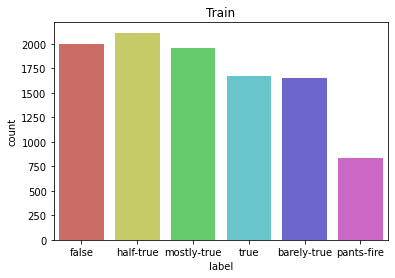

In [7]:
distribution(train, "Train")

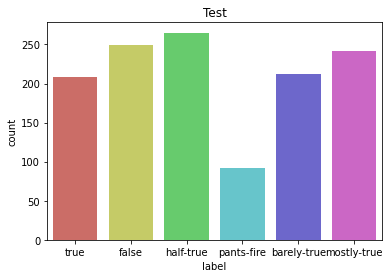

In [8]:
distribution(test, "Test")

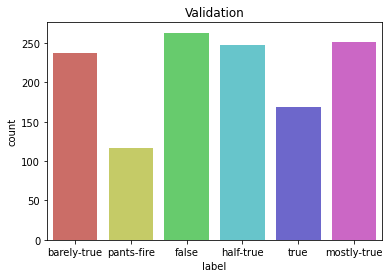

In [9]:
distribution(valid, "Validation")

## Check Quality

In [10]:
def quality(data, name):
    sns.heatmap(data.isnull(), cmap="YlGnBu").set(title=f'Null Values in {name}')
    plt.show()
    print(data.describe())
    print(data['label'].unique())

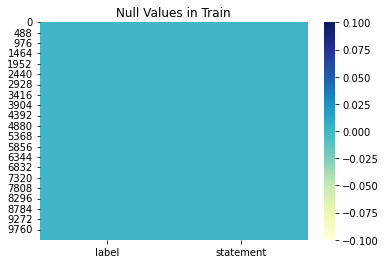

            label                                          statement
count       10240                                              10240
unique          6                                              10223
top     half-true  On changing the rules for filibusters on presi...
freq         2114                                                  3
['false' 'half-true' 'mostly-true' 'true' 'barely-true' 'pants-fire']


In [11]:
quality(train, name="Train")

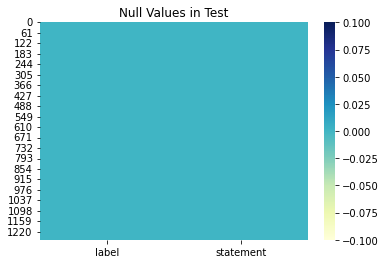

            label                                          statement
count        1267                                               1267
unique          6                                               1267
top     half-true  Building a wall on the U.S.-Mexico border will...
freq          265                                                  1
['true' 'false' 'half-true' 'pants-fire' 'barely-true' 'mostly-true']


In [12]:
quality(test, name="Test")

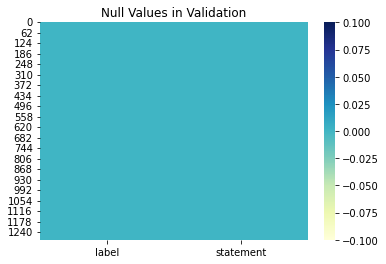

        label                                          statement
count    1284                                               1284
unique      6                                               1284
top     false  We have less Americans working now than in the...
freq      263                                                  1
['barely-true' 'pants-fire' 'false' 'half-true' 'true' 'mostly-true']


In [13]:
quality(valid, name="Validation")

## Preprocessing

In [14]:
eng_stemmer = PorterStemmer()
stopwords = set(nltk.corpus.stopwords.words('english'))

#### Most Used words

In [15]:
words = []
for data in [train, test, valid]:
    all_words = ' '.join(data['statement'].values)
    tokens = list(word_tokenize(all_words))
    words.extend(tokens)

In [16]:
word_counting = Counter(words)

In [17]:
word_counting = (sorted(word_counting.items(), key=lambda x: x[1], reverse=True))

In [18]:
len(word_counting)

16881

In [19]:
word_counting[:18]

[('.', 14318),
 ('the', 10676),
 (',', 6711),
 ('of', 5979),
 ('in', 5841),
 ('to', 5578),
 ('a', 4336),
 ('and', 3462),
 ('Says', 2822),
 ('for', 2534),
 ('that', 2280),
 ('is', 2263),
 ('$', 1627),
 ('on', 1610),
 ('The', 1607),
 ('has', 1600),
 ('have', 1566),
 ('percent', 1500)]

In [20]:
common_words=[word[0].lower() for word in word_counting[:18]]

In [21]:
def preprocess(data, exclude_stop_words=True, stem=True):
    tokens =list(word_tokenize(data))
    stemmed_tokens = [str(eng_stemmer.stem(word.lower())) for word in tokens if word.lower() not in stopwords and word.lower() not in common_words]
    return ' '.join(stemmed_tokens)

In [22]:
def clean_statement(dataset):
    for i, v in dataset.iterrows():
        dataset['statement'][i] = preprocess(dataset['statement'][i])
    return dataset

In [23]:
data = clean_statement(train)
data.head()

,label,statement
0,false,anni list polit group support third-trimest ab...
1,half-true,declin coal start ? start natur ga took start ...
2,mostly-true,hillari clinton agre john mccain `` vote give ...
3,false,health care reform legisl like mandat free sex...
4,half-true,econom turnaround start end term


In [24]:
clean_train = clean_statement(train)
clean_test = clean_statement(test)
clean_valid = clean_statement(valid)

In [25]:
obs(clean_train, clean_test, clean_valid)

Training Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      10240 non-null  object
 1   statement  10240 non-null  object
dtypes: object(2)
memory usage: 160.1+ KB
None
         label                                          statement
0        false  anni list polit group support third-trimest ab...
1    half-true  declin coal start ? start natur ga took start ...
2  mostly-true  hillari clinton agr john mccain `` vote give g...
3        false  health care reform legisl like mandat free sex...
4    half-true                   econom turnaround start end term



Testing Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      1267 non-null   object
 1   statement  1267 non-null   ob

In [26]:
def clean_labels(dataset):
    for i, v in dataset.iterrows():
        if dataset['label'][i]=='mostly-true' or dataset['label'][i]=='half-true' or dataset['label'][i]=='true' :
            dataset['label'][i]='true'
        else:
            dataset['label'][i]='false'
    return dataset

In [27]:
clean_train = clean_labels(clean_train)
clean_test = clean_labels(clean_test)
clean_valid = clean_labels(clean_valid)

In [28]:
obs(clean_train, clean_test, clean_valid)

Training Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      10240 non-null  object
 1   statement  10240 non-null  object
dtypes: object(2)
memory usage: 160.1+ KB
None
   label                                          statement
0  false  anni list polit group support third-trimest ab...
1   true  declin coal start ? start natur ga took start ...
2   true  hillari clinton agr john mccain `` vote give g...
3  false  health care reform legisl like mandat free sex...
4   true                   econom turnaround start end term



Testing Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      1267 non-null   object
 1   statement  1267 non-null   object
dtypes: object(2)
memory usage:

In [29]:
write_dir = os.path.join(os.getcwd(), 'cleaned_data')

if os.path.isdir(write_dir):
    shutil.rmtree(write_dir)
os.mkdir(write_dir)

clean_train.to_csv(os.path.join(write_dir, 'train.csv'), index=False)
clean_test.to_csv(os.path.join(write_dir, 'test.csv'), index=False)
clean_valid.to_csv(os.path.join(write_dir, 'valid.csv'), index=False)